# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as ks
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
print(tf.__version__)
print(ks.__version__)

2.9.1
2.9.0


## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

data = pd.get_dummies(dataset.iloc[:, :-1], columns=['Geography'])

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [5]:
X = data.iloc[:, 3:].values
y = dataset.iloc[:, -1].values.astype(np.float16)


In [6]:
X[1]

array([608, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58, 0, 0, 1],
      dtype=object)

In [7]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Encoding categorical data

Label Encoding the "Gender" column

In [9]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [10]:
X[0:10, :]

array([[619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88, 1, 0, 0],
       [608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58, 0, 0, 1],
       [502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57, 1, 0, 0],
       [699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63, 1, 0, 0],
       [850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1, 0, 0, 1],
       [645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71, 0, 0, 1],
       [822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8, 1, 0, 0],
       [376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88, 0, 1, 0],
       [501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5, 1, 0, 0],
       [684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73, 1, 0, 0]],
      dtype=object)

One Hot Encoding the "Geography" column

In [11]:
""" Så skulle vi använda OneHotEncoder med ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
"""

" Så skulle vi använda OneHotEncoder med ColumnTransformer\n\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')\nX = np.array(ct.fit_transform(X))\n"

### Feature Scaling

In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)


### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size= 0.2, random_state=0)

In [14]:
print(X_train[1, 1])

0.9124191495230393


## Part 2 - Building the ANN

### Initializing the ANN

In [15]:
ann = ks.models.Sequential()

In [39]:
X.shape

(10000, 12)

### Adding the input layer and the first hidden layer

In [16]:
ann.add(ks.layers.Dense(units = 6, activation ='relu'))

### Adding the second hidden layer

In [17]:
ann.add(ks.layers.Dense(units = 6, activation ='relu'))

### Adding the output layer

In [18]:
ann.add(ks.layers.Dense(units = 1, activation =  'sigmoid'))

## Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [20]:
type(y_train[1])

numpy.float16

In [21]:
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.7172 - accuracy: 0.5531
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4619 - accuracy: 0.7970
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8035
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.8081
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8136
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8199
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.8295
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8332
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3883 - accura

In [22]:
X[1]

array([-0.44003595, -1.09598752,  0.19816383, -1.38753759,  0.11735002,
       -0.91158349, -1.54776799,  0.97024255,  0.21653375, -1.00280393,
       -0.57873591,  1.74273971])

## Part 4 - Making the predictions and evaluating the model

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

In [23]:
c = sc.transform([[600, 1,40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]])

In [24]:
print(c)

[[-0.52281016  0.91241915  0.10281024 -0.69598177 -0.26422114  0.80773656
   0.64609167  0.97024255 -0.87101922  0.99720391 -0.57873591 -0.57380915]]


In [25]:
ann.predict(c)

1/1 [==============================] - 0s 78ms/step


array([[0.02456462]], dtype=float32)

In [26]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

### Predicting the Test set results

In [30]:
y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
print(classification_report(y_test,y_pred>0.5))


              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1595
         1.0       0.71      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### Making the Confusion Matrix

Text(69.0, 0.5, 'Truth')

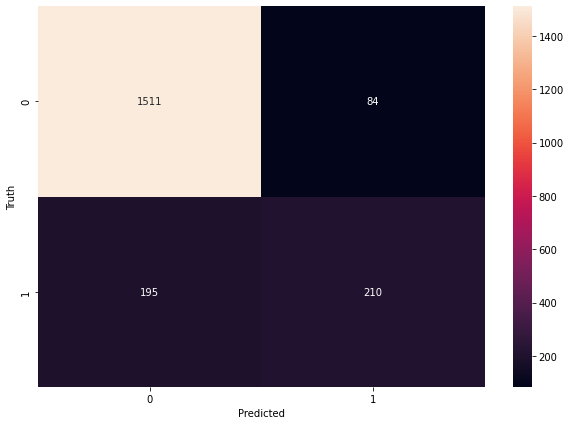

In [38]:
import seaborn as sn
cm= confusion_matrix(y_test,y_pred>0.5)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')